In [4]:
import sys
import os
sys.path.insert(0, r"C:\Users\Yarden\Computer Science\Masters\1\Advance Machine Learning\final project\src")

In [5]:
from utils import DataUtils
from TCK import TCK
from GMM_MAP_EM import GMM_MAP_EM

from pathlib import Path
import numpy as np
import pickle

from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

In [6]:
root_path = Path(r"..\..\..\.")
data_path = root_path / "data"
models_path = root_path / "models"

In [63]:
import gc
from sklearn.preprocessing import MinMaxScaler

def run_evaluation(dataset_name, tck_model_args):
#     similarity_function = tck_model_args['similarity_function']
    C = tck_model_args['C']
    Q = tck_model_args['Q']
    single_gmm_num_iter = tck_model_args['single_gmm_num_iter']
    max_features = tck_model_args['max_features']
    X_train, X_test, y_train, y_test = DataUtils.load_numpy_array(data_path / dataset_name)
    fig, axes = plt.subplots(1, len(tck_model_args['similarity_function']), figsize = (15,8))
    
    for i, similarity_function in enumerate(tck_model_args['similarity_function']):
        gc.collect()
        model_name = f"similarity_function-{similarity_function}_C-{C}_Q-{Q}_single_gmm_num_iter-{single_gmm_num_iter}_max_features-{max_features}"
        path = models_path / dataset_name / model_name
        
        with open(path / "model", "rb") as fis:
            tck_model = pickle.loads(fis.read())

        K_star = np.load(path / "K_Star.npy")
    
        tck_y_pred = y_train[K_star.T.argmax(axis=1)].astype(int)
        accuracy = accuracy_score(y_test, tck_y_pred)
    
        X_pca = KernelPCA(n_components=2, kernel='precomputed').fit_transform(tck_model.K)
        X_pca = MinMaxScaler().fit_transform(X_pca)
        ax = axes[i]
        ax.set_box_aspect(1)
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
        ax.set_title(f"similarity function (accuracy): {similarity_function}({accuracy:.2f})")
        
#     fig.tight_layout()
    plt.show()

# Syntetic

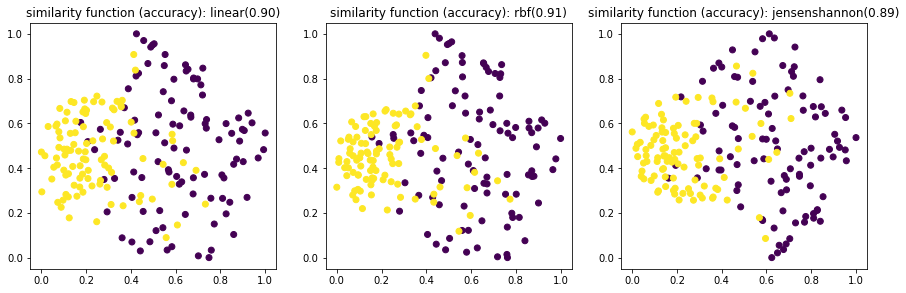

In [64]:
tck_model_args = {}
tck_model_args['similarity_function'] = ['linear', 'rbf', 'jensenshannon']
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "Syntetic"

run_evaluation(dataset_name, tck_model_args)

# Pen Digits

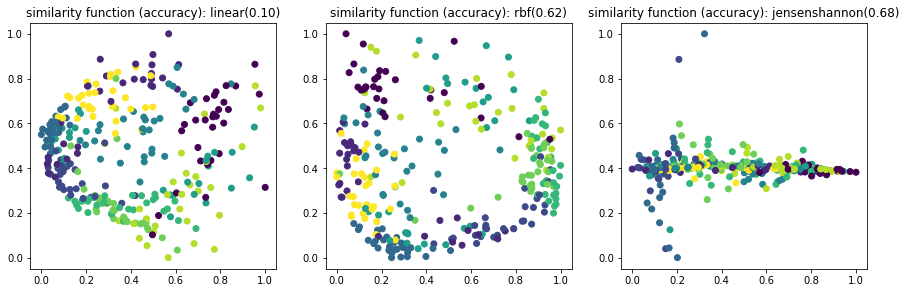

In [65]:
tck_model_args = {}
tck_model_args['similarity_function'] = ['linear', 'rbf', 'jensenshannon']
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "PenDigits"

run_evaluation(dataset_name, tck_model_args)

# Arabic Digits

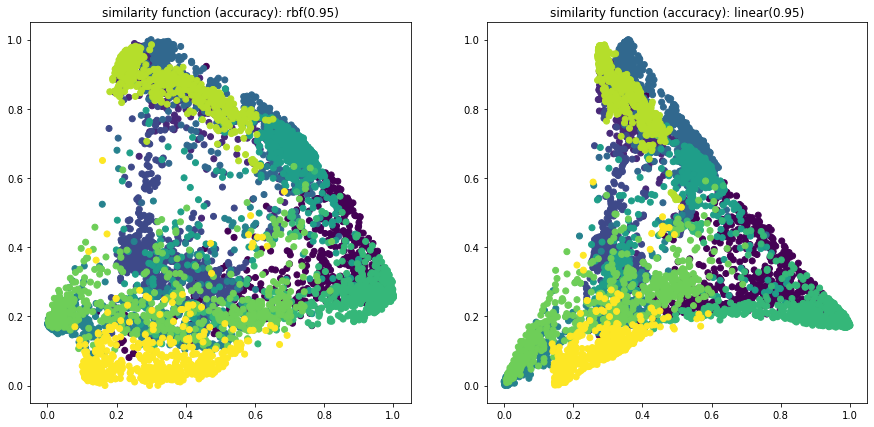

In [66]:
tck_model_args = {}
tck_model_args['similarity_function'] = ["rbf", "linear"]
tck_model_args['C'] =  40
tck_model_args['Q'] = 30
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "ArabicDigits"

run_evaluation(dataset_name, tck_model_args)

# Wisdom

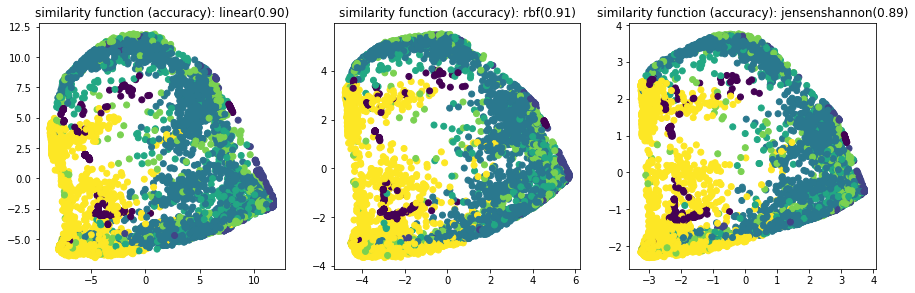

In [56]:
tck_model_args = {}
tck_model_args['similarity_function'] = ['linear', 'rbf', 'jensenshannon']
tck_model_args['C'] =  20
tck_model_args['Q'] = 20
tck_model_args['single_gmm_num_iter'] = 20
tck_model_args['max_features'] = 'all'
dataset_name = "Wisdom"

run_evaluation(dataset_name, tck_model_args)